<h1 align=center> SVM Parameter Tuning </h1>
<h5 align=right>
Vibhav Shukla <br>
102003772 <br>
3CO10 <br>

Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import random
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

Downloading and Preprocessing the Data

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary'])
df = df.replace(' ?', np.nan)
df.dropna(inplace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
print(df.salary.value_counts())

 <=50K    22654
 >50K      7508
Name: salary, dtype: int64


In [4]:
# perform label encoding on the categorical features
ohe = OneHotEncoder()
le = LabelEncoder()
df.salary = le.fit_transform(df.salary)
df = pd.get_dummies(df, columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(30162, 105)

In [10]:
sample_dict = {}
for i in range (10):
    sample_dict['S'+str(i+1)] = df.sample(frac=0.4,replace=False)

sample_dict

{'S1':        age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
 8164    23  182494              4             0             0              40   
 31761   44   69333             13             0             0              50   
 21285   50  146310              5             0             0              40   
 29615   31  243165             13             0             0              40   
 24176   39  218249             10             0             0              37   
 ...    ...     ...            ...           ...           ...             ...   
 27362   35   35330              9             0             0              40   
 5311    36  177907             16             0             0              40   
 30771   29  197565             11             0             0              35   
 2860    47  102308             14             0             0              40   
 4717    34  155343              9             0          1848              50   
 
        

SVM

In [11]:
#import svm
kernel_list = ['linear','poly','rbf','sigmoid']
c_list = [0.1, 0.5, 1, 2, 3]
gamma_list = [1, 0.1, 0.01, 0.001, 0.0001]
best_kernel = ''
best_accuracy = 0
best_C = 0
best_gamma = 0
result_dict = {}

for key, value in sample_dict.items():
    sample_df = value
    X = sample_df.drop('salary',axis=1)
    feature_name = X.columns
    y = sample_df['salary']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    for iter in range(1000):
        kernel = random.choice(kernel_list)
       
        C = random.choice(c_list)
        gamma = random.choice(gamma_list)
        model = SVC(kernel=kernel,C=C,gamma=gamma,max_iter=1)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_kernel = kernel
            best_C = C
            best_gamma = gamma
    result_dict[key] = {'accuracy' : best_accuracy, 'kernel' : best_kernel, 'C' : best_C, 'gamma' : best_gamma}
    print('Best accuracy for sample ',key,' is ',best_accuracy)


    

Best accuracy for sample  S1  is  0.7419889502762431
Best accuracy for sample  S2  is  0.7453038674033149
Best accuracy for sample  S3  is  0.7546961325966851
Best accuracy for sample  S4  is  0.7599447513812154
Best accuracy for sample  S5  is  0.7599447513812154
Best accuracy for sample  S6  is  0.7599447513812154
Best accuracy for sample  S7  is  0.7729281767955801
Best accuracy for sample  S8  is  0.7729281767955801
Best accuracy for sample  S9  is  0.7729281767955801
Best accuracy for sample  S10  is  0.7729281767955801


In [12]:
print(result_dict)
#convert dict to dataframe
result_df = pd.DataFrame(result_dict)
result_df = result_df.transpose()
result_df
max_accuracy = result_df['accuracy'].max()
best_sample_key = result_df[result_df['accuracy'] == max_accuracy].index[0]
best_sample_key
best_sample = sample_dict[best_sample_key]
best_sample.head()

{'S1': {'accuracy': 0.7419889502762431, 'kernel': 'poly', 'C': 1, 'gamma': 1}, 'S2': {'accuracy': 0.7453038674033149, 'kernel': 'poly', 'C': 2, 'gamma': 1}, 'S3': {'accuracy': 0.7546961325966851, 'kernel': 'rbf', 'C': 0.5, 'gamma': 0.1}, 'S4': {'accuracy': 0.7599447513812154, 'kernel': 'rbf', 'C': 1, 'gamma': 1}, 'S5': {'accuracy': 0.7599447513812154, 'kernel': 'rbf', 'C': 1, 'gamma': 1}, 'S6': {'accuracy': 0.7599447513812154, 'kernel': 'rbf', 'C': 1, 'gamma': 1}, 'S7': {'accuracy': 0.7729281767955801, 'kernel': 'sigmoid', 'C': 3, 'gamma': 0.1}, 'S8': {'accuracy': 0.7729281767955801, 'kernel': 'sigmoid', 'C': 3, 'gamma': 0.1}, 'S9': {'accuracy': 0.7729281767955801, 'kernel': 'sigmoid', 'C': 3, 'gamma': 0.1}, 'S10': {'accuracy': 0.7729281767955801, 'kernel': 'sigmoid', 'C': 3, 'gamma': 0.1}}


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
141,27,232782,10,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
25901,37,103925,10,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
18889,26,162312,10,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16723,21,151790,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17051,61,139391,10,0,1902,35,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
kernel_list = ['linear','poly','rbf','sigmoid']
accuracy_list = []
best_accuracy = 0



X = sample_df.drop('salary',axis=1)
feature_name = X.columns
y = sample_df['salary']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

for iter in range(1000):
    kernel = random.choice(kernel_list)
    
    C = random.uniform(0,1)
    gamma = random.uniform(0,1)
    model = SVC(kernel=kernel,C=C,gamma=gamma,max_iter=2)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
    accuracy_list.append(best_accuracy)

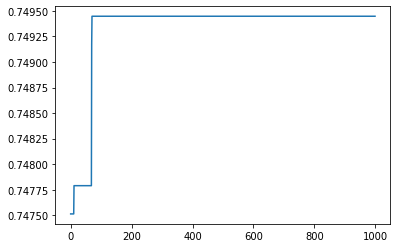

In [15]:
import matplotlib.pyplot as plt
plt.plot(accuracy_list)